In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.layers import Dense,Dropout,SimpleRNN
from keras.models import Sequential
from sklearn.metrics import r2_score
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, Flatten

In [5]:
chunksize = 10**5
data_path = '/content/drive/MyDrive/ML_practice/project3/xtrain.csv'
chunks = pd.read_csv(data_path, chunksize=chunksize, iterator=True)

X = pd.concat(chunks)

It is already easy to see a bunch of NaN values. And these have to be filled in because simply omitting NaNs dramatically reduces the size of our data.

In [6]:
print('Initial size: {}'.format(X.shape))
print('After NaN omit size: {}'.format(X.dropna().shape))

Initial size: (900000, 58)
After NaN omit size: (2462, 58)


In [7]:
# Check any number of columns with NaN
print(X.isnull().any().sum(), ' / ', len(X.columns))
# Check any number of data points with NaN
print(X.isnull().any(axis=1).sum(), ' / ', len(X))

58  /  58
897538  /  900000


It is impossible to subtract a specific column because NaN is evenly distributed over all columns.

In [8]:
#Lets check where these nulls are.
print (X.isna().sum())
print ('Null to Dataset Ratio in Dates: ',X.isnull().sum()[3]/X.shape[0]*100)

1      79471
2      91079
3      68450
4      71949
5      80625
6     103368
7     108418
8     103595
9      59956
10    105954
11    107911
12     77918
13     98176
14     77109
15    114703
16     77888
17     95691
18     92278
19     42414
20     70401
21     96029
22     86128
23    131388
24     76619
25     90600
26     76446
27    107409
28     87905
29    113008
30     78357
31     72053
32     79065
33     84265
34     84057
35     99034
36     84897
37     68204
38     83217
39     87747
40    113747
41     67152
42     55306
43     79941
44    105538
45     93753
46     79499
47     86376
48     92006
49     96042
50     63239
51    101394
52     56456
53     85983
54     87182
55     99144
56     87074
57     64634
58    113885
dtype: int64
Null to Dataset Ratio in Dates:  7.9943333333333335


In [9]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,-42.822536,NaN,12.0,NaN,1.0,2.0,24.0,-45.025510,NaN,1.0,3.910841,20.037239,NaN,-86.651101,17.0,-11.405955,15.0,4.0,-20.011925,27.271964,1.0,6.0,NaN,6.0,-30.662868,14.0,12.0,42.059872,1.0,2.0,5.0,3.0,1.242426,83.114610,-52.682517,6.0,1.397560,13.858564,5.010444,-1.035085,3.828019,-0.031808,28.884589,1.0,12.0,-41.656958,0.0,4.0,17.871210,4.0,15.0,21.863365,-13.349394,-2.215086,-5.137377,20.904186,53.939262,-17.328346
1,-13.478816,13.0,12.0,75.132502,0.0,2.0,24.0,-49.213545,7.0,0.0,103.028552,-44.603587,-75.457614,-109.772769,16.0,-7.386768,18.0,3.0,-52.541216,-23.053329,NaN,4.0,2.0,6.0,22.561123,14.0,11.0,63.131398,5.0,0.0,5.0,5.0,22.215217,110.620332,-40.950731,4.0,0.846452,3.514293,4.839021,-39.124343,-69.000123,6.253618,24.671585,0.0,10.0,-55.085782,NaN,5.0,21.511019,2.0,13.0,-2.880103,21.739125,5.464161,-30.347612,23.304507,47.746225,-47.305489
2,51.702721,13.0,12.0,63.459270,0.0,3.0,24.0,-58.777043,8.0,0.0,14.850524,53.516062,107.018098,-118.540065,17.0,-15.714059,17.0,3.0,27.369359,10.830127,NaN,1.0,2.0,5.0,6.025768,16.0,16.0,50.964614,3.0,1.0,3.0,3.0,19.954300,106.354195,NaN,5.0,1.574550,105.726958,19.599097,-3.289164,37.006898,7.935197,30.661709,2.0,12.0,-36.352728,1.0,NaN,NaN,3.0,16.0,21.851623,NaN,7.471764,-12.348314,34.406243,34.479515,-33.326172
3,NaN,12.0,13.0,-15.492561,1.0,1.0,23.0,0.624258,9.0,0.0,60.256580,32.640212,17.508750,-62.551522,NaN,-3.518383,20.0,3.0,-36.065397,-20.201555,6.0,7.0,0.0,NaN,2.248286,NaN,15.0,49.726230,4.0,1.0,3.0,3.0,6.221229,156.324453,NaN,4.0,2.032347,87.030045,3.688423,-29.169872,-107.670733,1.650324,32.429857,0.0,NaN,-83.484587,1.0,5.0,16.964848,2.0,15.0,-25.128119,-26.858262,54.203501,10.341217,29.080753,40.235855,-35.835956
4,7.633273,NaN,13.0,59.862681,0.0,3.0,NaN,-61.395319,NaN,0.0,62.568909,14.070520,68.503324,-109.179454,17.0,-12.600967,18.0,1.0,27.338942,8.290927,6.0,4.0,3.0,7.0,14.059204,13.0,10.0,55.275521,3.0,0.0,1.0,6.0,13.406162,35.263210,-39.812185,4.0,1.571146,64.538871,NaN,-19.693179,-73.401922,8.437617,28.678940,1.0,10.0,-67.043181,0.0,4.0,8.467076,4.0,14.0,30.610006,-15.663721,38.323843,-65.561821,33.965883,50.245794,-44.018245


Therefore, we have to fill missing data to avoid unwanted surprises during the models calculation.


Replace NaN with the mean of each column.

In [10]:
cols = X.columns.tolist()

for i in cols:
    col_mean = X[i].mean()
    X[i].fillna(col_mean, inplace = True)

In [11]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,-42.822536,12.329729,12.0,25.406132,1.0,2.0,24.000000,-45.025510,7.901558,1.0,3.910841,20.037239,34.218568,-86.651101,17.000000,-11.405955,15.0,4.0,-20.011925,27.271964,1.000000,6.0,1.943161,6.000000,-30.662868,14.000000,12.0,42.059872,1.0,2.0,5.0,3.0,1.242426,83.114610,-52.682517,6.0,1.397560,13.858564,5.010444,-1.035085,3.828019,-0.031808,28.884589,1.0,12.000000,-41.656958,0.000000,4.0000,17.871210,4.0,15.0,21.863365,-13.349394,-2.215086,-5.137377,20.904186,53.939262,-17.328346
1,-13.478816,13.000000,12.0,75.132502,0.0,2.0,24.000000,-49.213545,7.000000,0.0,103.028552,-44.603587,-75.457614,-109.772769,16.000000,-7.386768,18.0,3.0,-52.541216,-23.053329,3.996705,4.0,2.000000,6.000000,22.561123,14.000000,11.0,63.131398,5.0,0.0,5.0,5.0,22.215217,110.620332,-40.950731,4.0,0.846452,3.514293,4.839021,-39.124343,-69.000123,6.253618,24.671585,0.0,10.000000,-55.085782,0.180856,5.0000,21.511019,2.0,13.0,-2.880103,21.739125,5.464161,-30.347612,23.304507,47.746225,-47.305489
2,51.702721,13.000000,12.0,63.459270,0.0,3.0,24.000000,-58.777043,8.000000,0.0,14.850524,53.516062,107.018098,-118.540065,17.000000,-15.714059,17.0,3.0,27.369359,10.830127,3.996705,1.0,2.000000,5.000000,6.025768,16.000000,16.0,50.964614,3.0,1.0,3.0,3.0,19.954300,106.354195,-40.156848,5.0,1.574550,105.726958,19.599097,-3.289164,37.006898,7.935197,30.661709,2.0,12.000000,-36.352728,1.000000,4.1514,20.596154,3.0,16.0,21.851623,-19.295371,7.471764,-12.348314,34.406243,34.479515,-33.326172
3,11.012513,12.000000,13.0,-15.492561,1.0,1.0,23.000000,0.624258,9.000000,0.0,60.256580,32.640212,17.508750,-62.551522,17.017246,-3.518383,20.0,3.0,-36.065397,-20.201555,6.000000,7.0,0.000000,5.242677,2.248286,13.804168,15.0,49.726230,4.0,1.0,3.0,3.0,6.221229,156.324453,-40.156848,4.0,2.032347,87.030045,3.688423,-29.169872,-107.670733,1.650324,32.429857,0.0,10.854306,-83.484587,1.000000,5.0000,16.964848,2.0,15.0,-25.128119,-26.858262,54.203501,10.341217,29.080753,40.235855,-35.835956
4,7.633273,12.329729,13.0,59.862681,0.0,3.0,23.222268,-61.395319,7.901558,0.0,62.568909,14.070520,68.503324,-109.179454,17.000000,-12.600967,18.0,1.0,27.338942,8.290927,6.000000,4.0,3.000000,7.000000,14.059204,13.000000,10.0,55.275521,3.0,0.0,1.0,6.0,13.406162,35.263210,-39.812185,4.0,1.571146,64.538871,-6.123216,-19.693179,-73.401922,8.437617,28.678940,1.0,10.000000,-67.043181,0.000000,4.0000,8.467076,4.0,14.0,30.610006,-15.663721,38.323843,-65.561821,33.965883,50.245794,-44.018245


In [12]:
# X = X.fillna(method='bfill').fillna(method='ffill')
# X.head()

In [15]:
data_path = '/content/drive/MyDrive/ML_practice/project3/ytrain.csv'
chunks = pd.read_csv(data_path, chunksize=chunksize, iterator=True)

y = pd.concat(chunks)

And convert loaded y into array to work with train_test_split function.

In [16]:
y = np.array(y).ravel()

Data distributions
 - Check distribution each columns with histogram

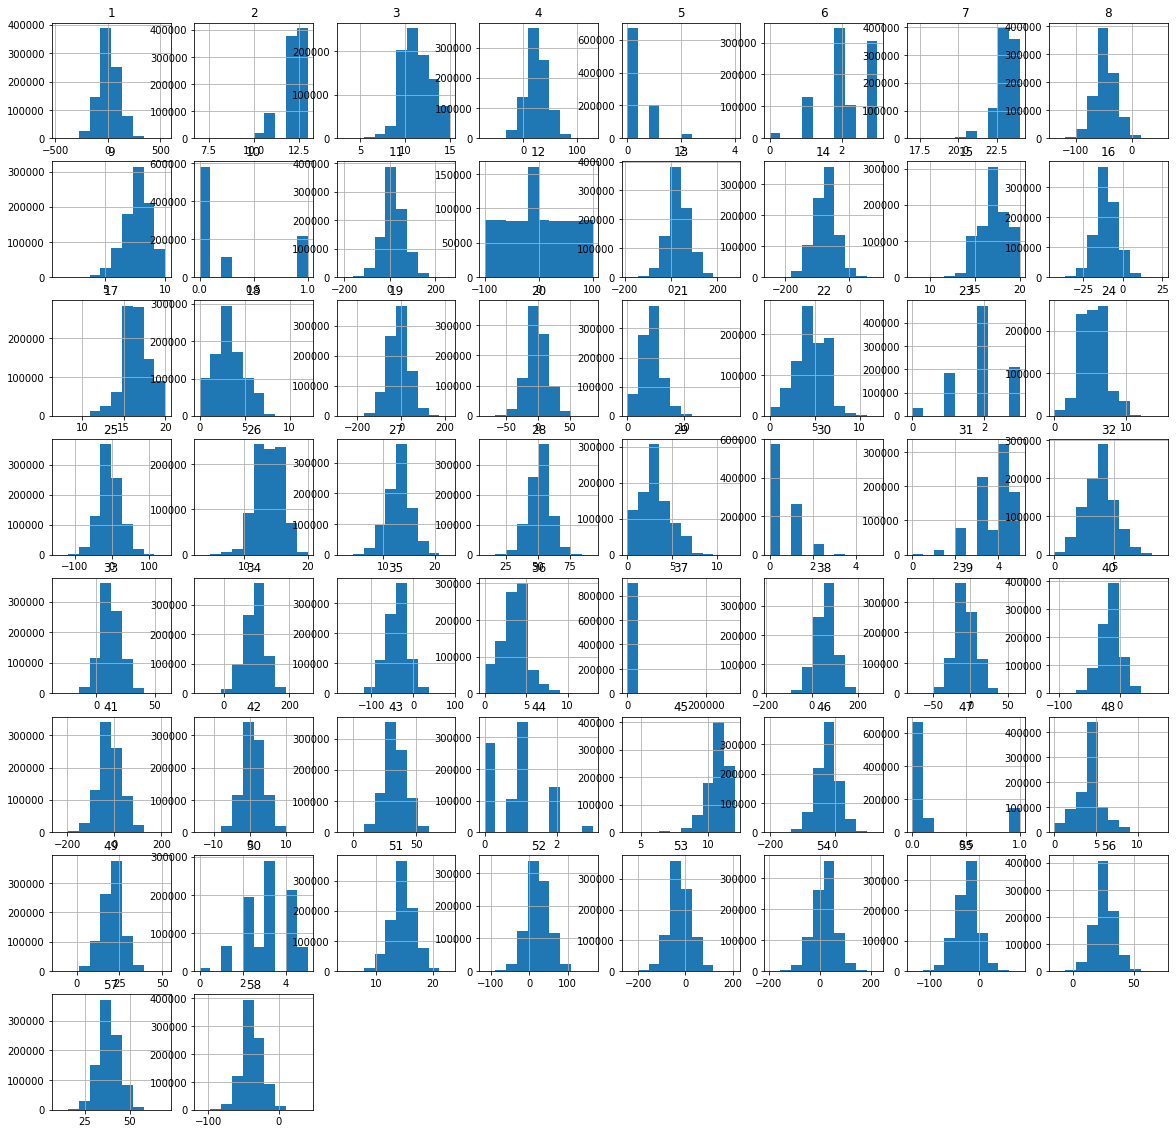

In [17]:
plt.figure(figsize=(20,20))
for i in range(0,58):
    plt.subplot(8,8,i+1)
    plt.title(X.columns[i])
    X.iloc[:,i].hist()

### Data Scaling

In [18]:
X = StandardScaler().fit_transform(X)

i=1
features = []
for i in range(1,59):
    str(i)
    features.append(i)

pd.DataFrame(X, columns=features).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,-5.638929e-01,4.703933e-15,0.410460,1.238396e-14,1.339988,-0.248943,9.557818e-01,0.068418,-3.572334e-15,1.754344,-0.321204,0.363723,-9.399861e-15,-0.312430,-1.158249e-02,-0.185863,-0.924241,0.497782,-0.164799,1.710715,-1.584786e+00,0.921433,2.905161e-16,4.160300e-01,-0.914932,0.099018,-0.423357,-1.137296,-1.402042,2.414385,1.378296,-0.482288,-1.241901,-0.347372,-4.937038e-01,1.537186,-0.017242,-0.988026,7.855151e-01,0.905590,0.415558,-0.356293,-0.526634,0.171013,1.188142,-0.576551,-0.494192,-0.095134,-4.498439e-01,0.962061,0.147188,-0.077243,1.312168e-01,-0.435467,0.928792,-0.649745,2.703742,1.381513
1,-2.565334e-01,8.874649e-01,0.410460,2.512101e+00,-0.611824,-0.248943,9.557818e-01,-0.155586,-7.252292e-01,-0.646074,1.808291,-0.807256,-2.378558e+00,-0.978719,-6.831986e-01,0.412358,0.939754,-0.177254,-0.862707,-1.393837,2.348535e-16,-0.330903,7.436611e-02,4.160300e-01,0.926425,0.099018,-0.871808,1.400638,1.284634,-0.764360,1.378296,0.937475,1.079596,0.527626,-3.129119e-02,0.272765,-0.018057,-1.218925,7.734206e-01,-1.343682,-1.100341,1.805672,-1.011623,-1.180701,-0.885959,-0.976621,0.000000,0.533231,1.510293e-01,-0.928376,-0.775478,-0.954134,9.055558e-01,-0.256421,-0.205299,-0.352922,1.631657,-0.722326
2,4.262078e-01,8.874649e-01,0.410460,1.922387e+00,-0.611824,1.129114,9.557818e-01,-0.667105,7.918890e-02,-0.646074,-0.086170,0.970198,1.578810e+00,-1.231364,-1.158249e-02,-0.827087,0.318422,-0.177254,0.851755,0.696423,2.348535e-16,-2.209408,7.436611e-02,-1.333132e-01,0.354362,1.110271,1.370447,-0.064775,-0.058704,0.825013,-0.747397,-0.482288,0.829333,0.391914,-4.649046e-14,0.904976,-0.016981,1.062604,1.814791e+00,0.772481,1.106167,2.384076,-0.322057,1.522727,1.188142,-0.418528,2.238322,0.000000,-2.697877e-14,0.016843,0.608521,-0.077659,1.309311e-14,-0.209612,0.604405,1.019915,-0.664961,0.258762
3,4.465529e-15,-4.365747e-01,1.036213,-2.066140e+00,1.339988,-1.627001,-2.731521e-01,2.510067,8.836070e-01,-0.646074,0.889356,0.592028,-3.623874e-01,0.382040,-4.772120e-15,0.988133,2.182417,-0.177254,-0.509223,-1.217912,1.059428e+00,1.547601,-2.542370e+00,4.879148e-16,0.223674,0.000000,0.921996,-0.213931,0.612965,0.825013,-0.747397,-0.482288,-0.690793,1.981541,-4.649046e-14,0.272765,-0.016304,0.645263,6.922423e-01,-0.755844,-1.905260,0.222301,-0.118514,-1.180701,0.000000,-1.822675,2.238322,0.533231,-5.994695e-01,-0.928376,0.147188,-1.742588,-1.668991e-01,0.879968,1.625101,0.361367,0.331526,0.082622
4,-3.539569e-02,4.703933e-15,1.036213,1.740693e+00,-0.611824,1.129114,-8.732100e-15,-0.807147,-3.572334e-15,-0.646074,0.939036,0.255635,7.435368e-01,-0.961622,-1.158249e-02,-0.363730,0.939754,-1.527325,0.851102,0.539781,1.059428e+00,-0.330903,1.382734e+00,9.653732e-01,0.632289,-0.406609,-1.320259,0.454447,-0.058704,-0.764360,-2.873091,1.647357,0.104514,-1.869595,1.358499e-02,0.272765,-0.016986,0.143229,1.253276e-15,-0.196220,-1.191964,2.556891,-0.550308,0.171013,-0.885959,-1.332855,-0.494192,-0.095134,-2.002313e+00,0.962061,-0.314145,0.232732,8.014383e-02,0.509724,-1.789421,0.965460,2.064360,-0.491623


In [19]:
# # Transform to normal distribution
# features = X.columns.tolist()
    
# for i in cols:
#     X[i] = (X[i]-X[i].mean())/X[i].std()
    
# pd.DataFrame(X, columns=features).head()

In [20]:
Y = pd.DataFrame(y)
Y.rename(columns={0: 'target'}, inplace=True)
data = pd.concat((pd.DataFrame(X, columns=features), Y), axis = 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y = np.ravel(y)

Check the distribution of decision variable

In [21]:
pd.value_counts(Y['target'].values, sort=False)

0    623940
1    276060
dtype: int64

### Data Spliting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Random Forest

In [23]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# # Number of features to consider at every split
# max_features = [5,6,7,8,9,10,11,12,13,14,15]
# # Maximum number of levels in tree
# max_depth = [5,6,7,8,9,10]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [24]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [25]:
# rf_random.best_params_

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [27]:
print(rfc.score(X_test,y_test))

0.6946666666666667


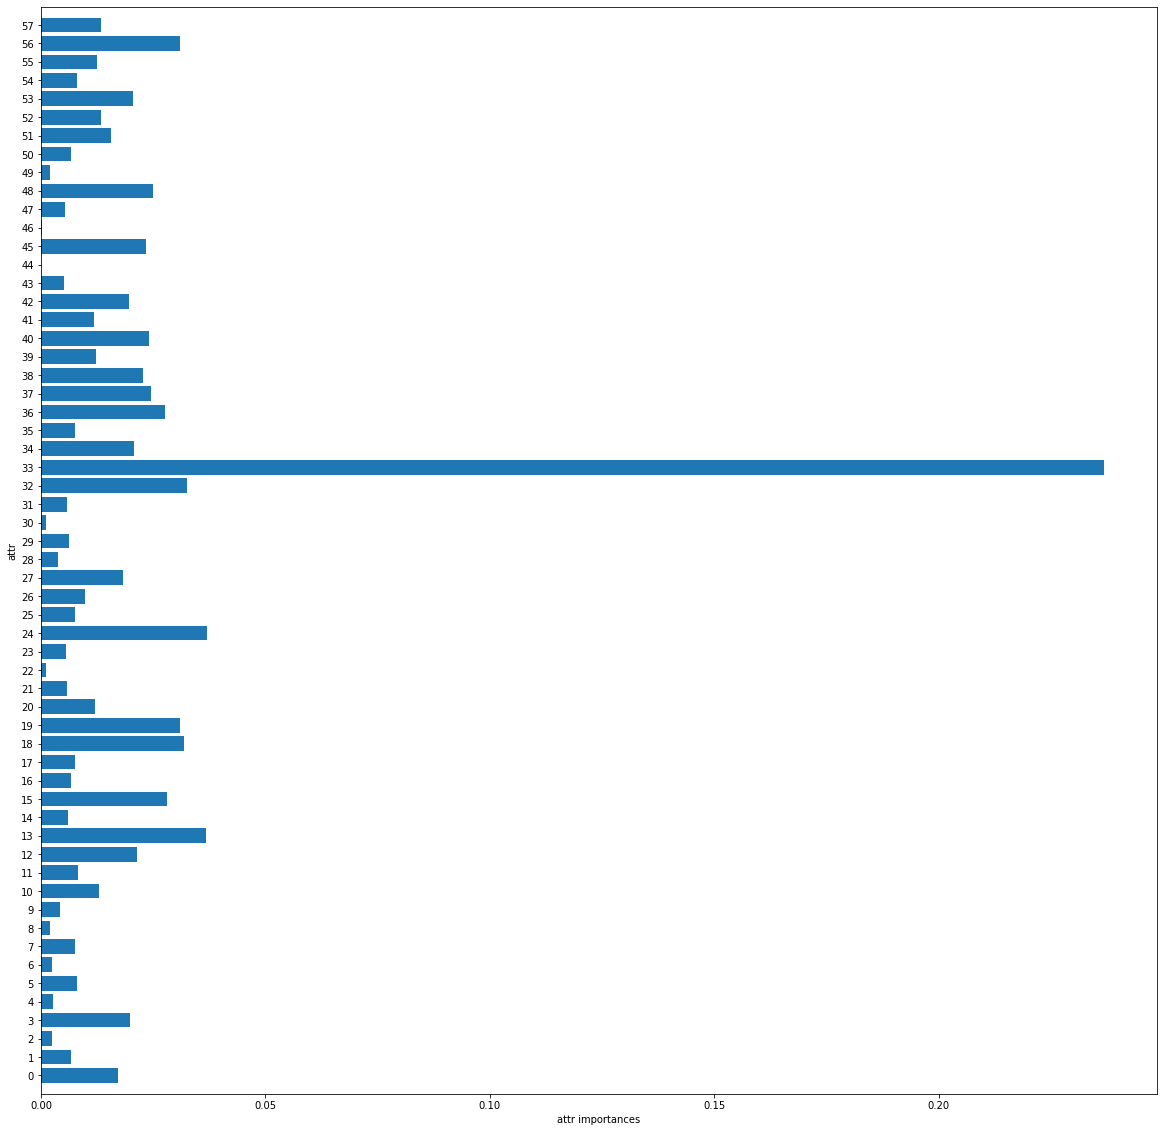

In [28]:
## feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):
    
    plt.figure(figsize=(20,20))

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features))

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

In [29]:
dict_imp = {}

for i in range(X.shape[1]):
    dict_imp[i] = rfc.feature_importances_[i]

In [30]:
dict_imp

{0: 0.01708391746333211,
 1: 0.00675424670660241,
 2: 0.0023622878513014514,
 3: 0.01977467647290556,
 4: 0.002587085304519189,
 5: 0.008136019782164897,
 6: 0.0024464900969719335,
 7: 0.00757508227638382,
 8: 0.0020792751305163267,
 9: 0.004231148573230799,
 10: 0.01293935707953916,
 11: 0.008195107671193278,
 12: 0.021412311098483117,
 13: 0.03682762135920337,
 14: 0.0060641474662330086,
 15: 0.02818321658887411,
 16: 0.006773777021703367,
 17: 0.0074860186744962285,
 18: 0.03189744213602014,
 19: 0.030940674085019975,
 20: 0.012071933621555866,
 21: 0.005764940830785199,
 22: 0.0011365185868525364,
 23: 0.005475451768101446,
 24: 0.03693719728729833,
 25: 0.007584988003183643,
 26: 0.009901020671069134,
 27: 0.01832192861412269,
 28: 0.0037327228064580205,
 29: 0.006140731310471152,
 30: 0.0012350452397169886,
 31: 0.00578242873443271,
 32: 0.032488336717429005,
 33: 0.23673012215170924,
 34: 0.020627599918416797,
 35: 0.007576198407650373,
 36: 0.02752822833681392,
 37: 0.024519028

In [31]:
import operator

sort_imp = sorted(dict_imp.items(), key=operator.itemgetter(1), reverse=True)

print(sort_imp)

[(33, 0.23673012215170924), (24, 0.03693719728729833), (13, 0.03682762135920337), (32, 0.032488336717429005), (18, 0.03189744213602014), (56, 0.03095587109560279), (19, 0.030940674085019975), (15, 0.02818321658887411), (36, 0.02752822833681392), (48, 0.025008827663651544), (37, 0.024519028464763448), (40, 0.024134142875562783), (45, 0.02333543989155313), (38, 0.022629823084058497), (12, 0.021412311098483117), (34, 0.020627599918416797), (53, 0.020496243223061497), (3, 0.01977467647290556), (42, 0.019655127944155304), (27, 0.01832192861412269), (0, 0.01708391746333211), (51, 0.015561549790046883), (57, 0.013444480185309951), (52, 0.013335919547365984), (10, 0.01293935707953916), (55, 0.012444723075993577), (39, 0.012241772920936558), (20, 0.012071933621555866), (41, 0.011729884345772221), (26, 0.009901020671069134), (11, 0.008195107671193278), (5, 0.008136019782164897), (54, 0.008073415806880788), (25, 0.007584988003183643), (35, 0.007576198407650373), (7, 0.00757508227638382), (17, 0.0

# Since there are many variables, some variables are extracted using feature importance of random forest.

In [32]:
s = sort_imp[:10]

In [33]:
imp_vari = []
for i in range(len(s)):
    imp_vari.append(s[i][0])

In [34]:
imp_vari

[33, 24, 13, 32, 18, 56, 19, 15, 36, 48]

In [35]:
topn_X = X.iloc[:,imp_vari]

In [36]:
topn_X.head()

,34,25,14,33,19,57,20,16,37,49
0,-0.347372,-0.914932,-0.312430,-1.241901,-0.164799,2.703742,1.710715,-0.185863,-0.017242,-4.498439e-01
1,0.527626,0.926425,-0.978719,1.079596,-0.862707,1.631657,-1.393837,0.412358,-0.018057,1.510293e-01
2,0.391914,0.354362,-1.231364,0.829333,0.851755,-0.664961,0.696423,-0.827087,-0.016981,-2.697877e-14
3,1.981541,0.223674,0.382040,-0.690793,-0.509223,0.331526,-1.217912,0.988133,-0.016304,-5.994695e-01
4,-1.869595,0.632289,-0.961622,0.104514,0.851102,2.064360,0.539781,-0.363730,-0.016986,-2.002313e+00


# Another dataset is created by extracting only those variables whose feature importance is greater than a certain value.

In [37]:
imp_over = []
for i in range(len(sort_imp)):
    if (sort_imp[i][1]) > 0.02:
        imp_over.append(sort_imp[i][0])
        
len(imp_over)

17

In [38]:
over_X = X.iloc[:,imp_over]

In [39]:
over_X.head()

,34,25,14,33,19,57,20,16,37,49,38,41,46,39,13,35,54
0,-0.347372,-0.914932,-0.312430,-1.241901,-0.164799,2.703742,1.710715,-0.185863,-0.017242,-4.498439e-01,-0.988026,0.415558,-0.576551,7.855151e-01,-9.399861e-15,-4.937038e-01,-0.435467
1,0.527626,0.926425,-0.978719,1.079596,-0.862707,1.631657,-1.393837,0.412358,-0.018057,1.510293e-01,-1.218925,-1.100341,-0.976621,7.734206e-01,-2.378558e+00,-3.129119e-02,-0.256421
2,0.391914,0.354362,-1.231364,0.829333,0.851755,-0.664961,0.696423,-0.827087,-0.016981,-2.697877e-14,1.062604,1.106167,-0.418528,1.814791e+00,1.578810e+00,-4.649046e-14,-0.209612
3,1.981541,0.223674,0.382040,-0.690793,-0.509223,0.331526,-1.217912,0.988133,-0.016304,-5.994695e-01,0.645263,-1.905260,-1.822675,6.922423e-01,-3.623874e-01,-4.649046e-14,0.879968
4,-1.869595,0.632289,-0.961622,0.104514,0.851102,2.064360,0.539781,-0.363730,-0.016986,-2.002313e+00,0.143229,-1.191964,-1.332855,1.253276e-15,7.435368e-01,1.358499e-02,0.509724


### Decision Tree

Make Decision Tree with reduced dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(topn_X, y, test_size=0.2, random_state=0)

In [41]:
clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=0) 

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [42]:
# y_pred_prob => First Element: Probability to predict as 0
#             => Second Element: Probability to predict as 1

y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob

array([[0.72693961, 0.27306039],
       [0.68947286, 0.31052714],
       [0.79882387, 0.20117613],
       ...,
       [0.69901664, 0.30098336],
       [0.68947286, 0.31052714],
       [0.69901664, 0.30098336]])

In [43]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [44]:
print(list(y_pred).count(0),list(y_pred).count(1))

175857 4143


[Text(167.4, 195.696, 'X[0] <= -0.369\ngini = 0.426\nsamples = 720000\nvalue = [498900, 221100]'),
 Text(83.7, 152.208, 'X[0] <= -0.431\ngini = 0.431\nsamples = 236762\nvalue = [162464, 74298]'),
 Text(41.85, 108.72, 'X[0] <= -0.559\ngini = 0.422\nsamples = 222302\nvalue = [155137, 67165]'),
 Text(20.925, 65.232, 'X[0] <= -0.632\ngini = 0.431\nsamples = 194321\nvalue = [133236, 61085]'),
 Text(10.4625, 21.744, 'gini = 0.421\nsamples = 178774\nvalue = [124966, 53808]'),
 Text(31.387500000000003, 21.744, 'gini = 0.498\nsamples = 15547\nvalue = [8270, 7277]'),
 Text(62.775000000000006, 65.232, 'X[8] <= -0.017\ngini = 0.34\nsamples = 27981\nvalue = [21901, 6080]'),
 Text(52.3125, 21.744, 'gini = 0.269\nsamples = 13790\nvalue = [11585, 2205]'),
 Text(73.2375, 21.744, 'gini = 0.397\nsamples = 14191\nvalue = [10316, 3875]'),
 Text(125.55000000000001, 108.72, 'X[8] <= -0.018\ngini = 0.5\nsamples = 14460\nvalue = [7327, 7133]'),
 Text(104.625, 65.232, 'X[0] <= -0.38\ngini = 0.472\nsamples = 638

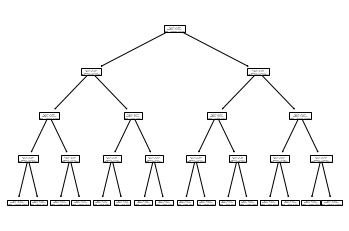

In [45]:
from sklearn import tree
clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=0) 
tree.plot_tree(clf_tree.fit(X_train, y_train)) 

In [50]:
# pip install sklearn.externals.six

ERROR: Could not find a version that satisfies the requirement sklearn.externals.six (from versions: none)
ERROR: No matching distribution found for sklearn.externals.six


In [51]:
from six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

In [52]:
target_name = np.array(['0', '1'])

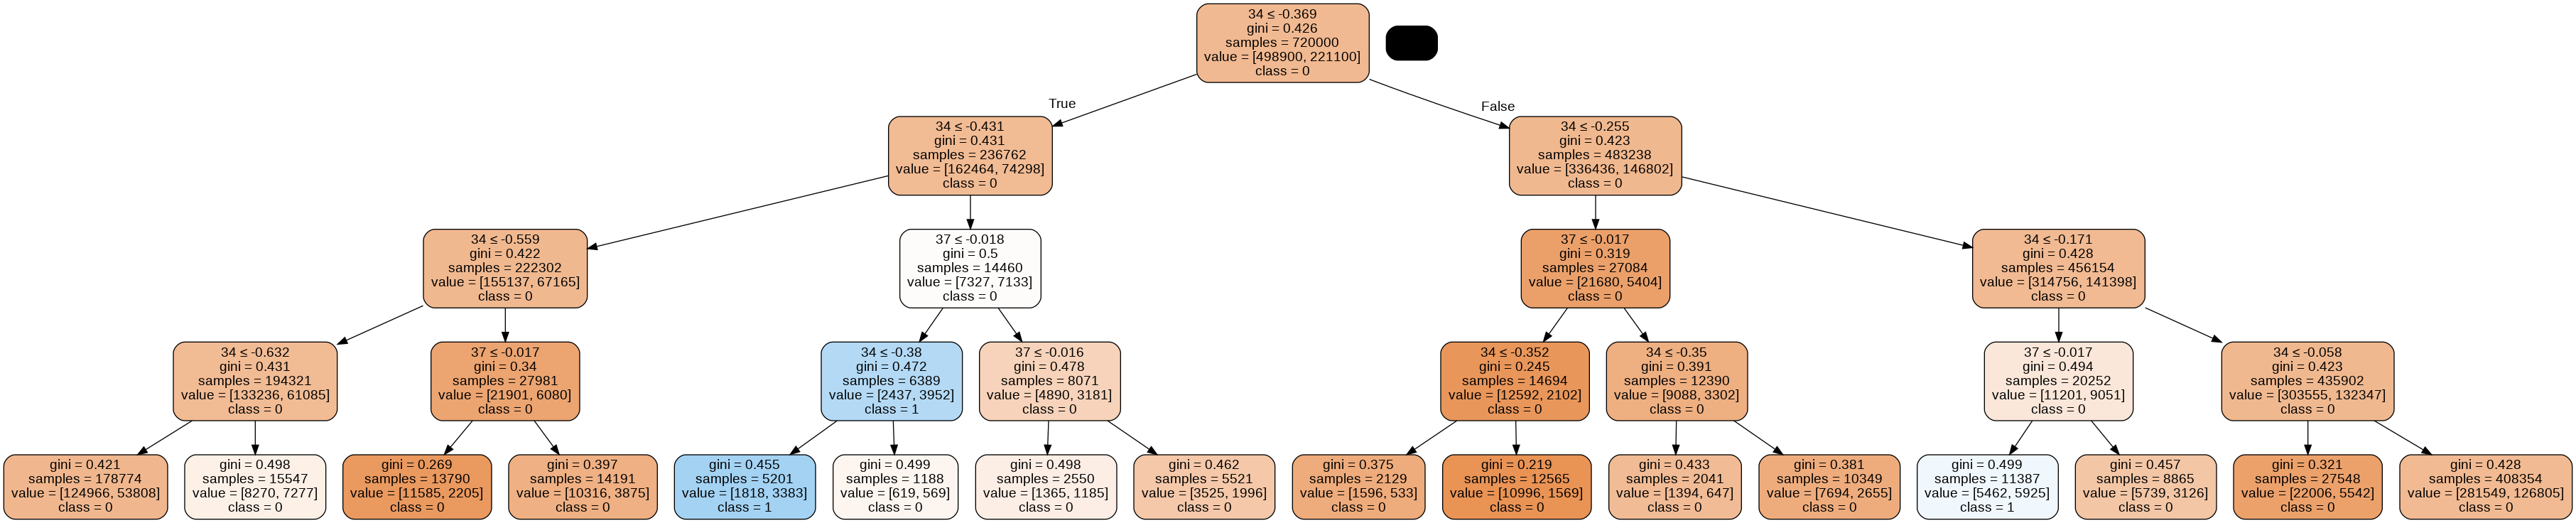

In [53]:
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(clf_tree, feature_names=topn_X.columns.tolist(), out_file = dot_file, class_names=target_name , \
                     filled =True, rounded=True, special_characters=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())

#### Performance Evaluation

In [54]:
from sklearn import metrics
import seaborn as sns

In [55]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.6957333333333333
Test_Accuracy: 0.6974055555555555


In [56]:
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_metrix)

[[123215   1825]
 [ 52642   2318]]


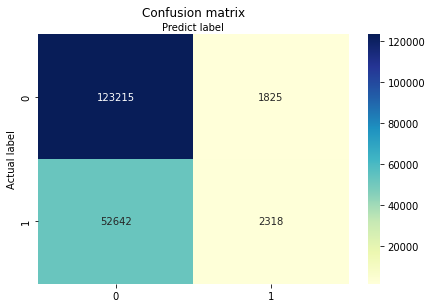

In [57]:
class_names = ['broken', 'not broken']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
 
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predict label")
plt.show()

### SVM

In [58]:
import sklearn.svm as svm
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
estimator = LinearSVC()
n_estimators = 10
n_jobs = 1
model = BaggingClassifier(base_estimator=estimator,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs)
model.fit(X_train,y_train)
print(model.predict(X_test))
print(model.predict_proba(topn_X))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [60]:
y_pred = model.predict(X_test)

In [61]:
clf_predictions = model.predict(X_test)
print("Accuracy: {}%".format(model.score(X_test, y_test) * 100 ))

Accuracy: 69.46722222222222%


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[125039      1]
 [ 54958      2]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82    125040
           1       0.67      0.00      0.00     54960

    accuracy                           0.69    180000
   macro avg       0.68      0.50      0.41    180000
weighted avg       0.69      0.69      0.57    180000



In [63]:
dual = False if topn_X.shape[0] > topn_X.shape[1] else True

# Multiprocessing 

In [64]:
model_2 = BaggingClassifier(LinearSVC(dual=dual), n_estimators=10, max_samples=0.1, n_jobs=5)
model_2.fit(X_train,y_train)
print(model_2.predict(X_test))
print(model_2.predict_proba(topn_X))

[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [65]:
y_pred_2 = model_2.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

[[125040      0]
 [ 54960      0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.69      1.00      0.82    125040
           1       0.00      0.00      0.00     54960

    accuracy                           0.69    180000
   macro avg       0.35      0.50      0.41    180000
weighted avg       0.48      0.69      0.57    180000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
svm_clf =svm.SVC(kernel = 'linear')

In [79]:
scores = cross_val_score(svm_clf, topn_X[:20000], y[:20000], cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, topn_X[:20000], y[:20000], cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.6916


In [80]:
svm_clf = svm.SVC(kernel = 'linear',random_state=100)
parameters = {'C': [0.01, 0.1, 1, 10]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train[:20000], y_train[:20000])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
0,0.01,0.69965
1,0.10,0.69965
2,1.00,0.69965
3,10.00,0.69965


In [81]:
svm_clf =svm.SVC(kernel = 'linear', C=0.1)

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
print(svclassifier.predict(X_test))

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
clf_predictions = svclassifier.predict(X_test)
print("Accuracy: {}%".format(svclassifier.score(X_test, y_test) * 100 ))

In [ ]:
svm_clf.fit(X_train, y_train)

In [ ]:
print(svm_clf.predict(X_test))

### Neural Network

#### MLP

In [ ]:
Y = pd.DataFrame(y)
Y.rename(columns={0: 'target'}, inplace=True)
data = pd.concat((topn_X, Y), axis = 1)
#data = pd.concat((over_X, Y), axis = 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
data

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
y_train

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(20, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.2)

In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

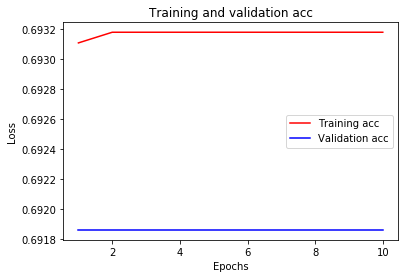

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

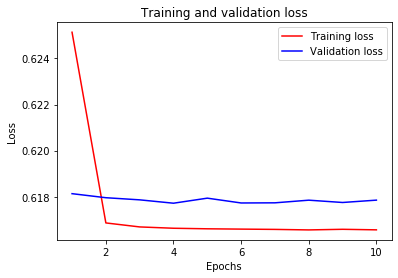

In [ ]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()